In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Loading the decision matrix from CSV file
df = pd.read_csv("data/decision_matrix.csv")
df


,Model,Text_Quality,Inference_Time,Model_Size,Efficiency
0,GPT-2,0.78,45,0.5,7
1,GPT-Neo,0.82,65,2.5,6
2,T5-Base,0.80,55,0.9,8
3,BART-Large,0.85,70,1.6,7


In [6]:
weights = np.array([0.40, 0.20, 0.15, 0.25])

# 1 → Benefit criterion, -1 → Cost criterion
criteria_type = np.array([1, -1, -1, 1])


In [7]:
decision_matrix = df.iloc[:, 1:].values

normalized_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))

normalized_df = pd.DataFrame(
    normalized_matrix,
    columns=df.columns[1:]
)

normalized_df


,Text_Quality,Inference_Time,Model_Size,Efficiency
0,0.479757,0.377964,0.159152,0.497468
1,0.504360,0.545949,0.795759,0.426401
2,0.492059,0.461957,0.286473,0.568535
3,0.522812,0.587945,0.509286,0.497468


In [8]:
weighted_matrix = normalized_matrix * weights

weighted_df = pd.DataFrame(
    weighted_matrix,
    columns=df.columns[1:]
)

weighted_df


,Text_Quality,Inference_Time,Model_Size,Efficiency
0,0.191903,0.075593,0.023873,0.124367
1,0.201744,0.109190,0.119364,0.106600
2,0.196823,0.092391,0.042971,0.142134
3,0.209125,0.117589,0.076393,0.124367


In [9]:
ideal_best = np.where(
    criteria_type == 1,
    weighted_matrix.max(axis=0),
    weighted_matrix.min(axis=0)
)

ideal_worst = np.where(
    criteria_type == 1,
    weighted_matrix.min(axis=0),
    weighted_matrix.max(axis=0)
)

ideal_best, ideal_worst


(array([0.20912487, 0.07559289, 0.02387276, 0.14213381]),
 array([0.19190282, 0.11758895, 0.11936382, 0.10660036]))

In [10]:
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))


In [11]:
closeness_coefficient = distance_worst / (distance_best + distance_worst)

df["Closeness_Coefficient"] = closeness_coefficient
df["Rank"] = df["Closeness_Coefficient"].rank(ascending=False)

df.sort_values("Rank")


,Model,Text_Quality,Inference_Time,Model_Size,Efficiency,Closeness_Coefficient,Rank
0,GPT-2,0.78,45,0.5,7,0.810485,1.0
2,T5-Base,0.80,55,0.9,8,0.757129,2.0
3,BART-Large,0.85,70,1.6,7,0.416201,3.0
1,GPT-Neo,0.82,65,2.5,6,0.107392,4.0


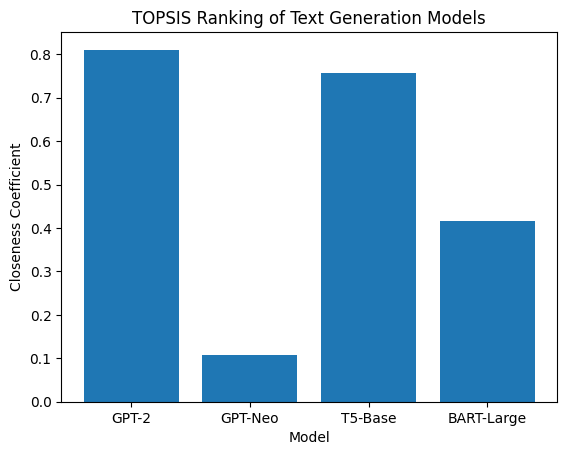

In [12]:
plt.figure()
plt.bar(df["Model"], df["Closeness_Coefficient"])
plt.xlabel("Model")
plt.ylabel("Closeness Coefficient")
plt.title("TOPSIS Ranking of Text Generation Models")
plt.show()
